## Create Latitude and Longitude Combinations

In [1]:
#Import dependecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import citipy
from citipy import citipy

#Import requests library
import requests
from config import weather_api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 


In [3]:
# Create a set of random lattitude and longitude  combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Create an empty list to hold the weather data.
city_data = []
record_count=0
set_count=0
# Print the beginning of the logging. 
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Loop through all the cities in our list. 
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes. 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # CReate endpoint URL with each city. 
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record and set numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count}| {city}")
    
    #Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        
        #Parse the Json and retrieve data. 
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data. 
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city information into city_data list. 
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp":city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind, 
                         "Country": city_country,
                         "Date": city_date})
    #If an error is experienced, skip city.
    except:
        print("City not found. Skipping...")
        pass
    
#Indicate that data loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 0| ushuaia
Processing Record 1 of Set 0| fomboni
Processing Record 2 of Set 0| singarayakonda
Processing Record 3 of Set 0| new norfolk
Processing Record 4 of Set 0| taolanaro
City not found. Skipping...
Processing Record 5 of Set 0| jyvaskyla
Processing Record 6 of Set 0| mataura
Processing Record 7 of Set 0| carutapera
Processing Record 8 of Set 0| atuona
Processing Record 9 of Set 0| balabac
Processing Record 10 of Set 0| port elizabeth
Processing Record 11 of Set 0| araouane
Processing Record 12 of Set 0| presidente franco
Processing Record 13 of Set 0| bambous virieux
Processing Record 14 of Set 0| chokurdakh
Processing Record 15 of Set 0| jamestown
Processing Record 16 of Set 0| aswan
Processing Record 17 of Set 0| port alfred
Processing Record 18 of Set 0| kapaa
Processing Record 19 of Set 0| aksu
Processing Record 20 of Set 0| isangel
Processing Record 21 of Set 0| olinda
Processing Record 22

Processing Record 42 of Set 3| luganville
Processing Record 43 of Set 3| sibolga
Processing Record 44 of Set 3| liverpool
Processing Record 45 of Set 3| kruisfontein
Processing Record 46 of Set 3| bengkulu
Processing Record 47 of Set 3| riyadh
Processing Record 48 of Set 3| thompson
Processing Record 49 of Set 3| hay river
Processing Record 50 of Set 3| huarmey
Processing Record 1 of Set 4| chabahar
Processing Record 2 of Set 4| flinders
Processing Record 3 of Set 4| laiwu
Processing Record 4 of Set 4| east london
Processing Record 5 of Set 4| puerto narino
Processing Record 6 of Set 4| haines junction
Processing Record 7 of Set 4| tura
Processing Record 8 of Set 4| odweyne
Processing Record 9 of Set 4| luchegorsk
Processing Record 10 of Set 4| qaqortoq
Processing Record 11 of Set 4| tsihombe
City not found. Skipping...
Processing Record 12 of Set 4| batemans bay
Processing Record 13 of Set 4| cambridge
Processing Record 14 of Set 4| lebu
Processing Record 15 of Set 4| san-pedro
Proces

Processing Record 36 of Set 7| san quintin
Processing Record 37 of Set 7| alta floresta
Processing Record 38 of Set 7| birao
Processing Record 39 of Set 7| mergui
City not found. Skipping...
Processing Record 40 of Set 7| qui nhon
Processing Record 41 of Set 7| roswell
Processing Record 42 of Set 7| alekseyevka
Processing Record 43 of Set 7| nuuk
Processing Record 44 of Set 7| gushikawa
Processing Record 45 of Set 7| hohoe
Processing Record 46 of Set 7| maceio
Processing Record 47 of Set 7| faanui
Processing Record 48 of Set 7| aitape
Processing Record 49 of Set 7| yashkul
Processing Record 50 of Set 7| poronaysk
Processing Record 1 of Set 8| provideniya
Processing Record 2 of Set 8| tipperary
Processing Record 3 of Set 8| panaba
Processing Record 4 of Set 8| boa vista
Processing Record 5 of Set 8| kilmez
City not found. Skipping...
Processing Record 6 of Set 8| lashio
Processing Record 7 of Set 8| savinka
Processing Record 8 of Set 8| lichinga
Processing Record 9 of Set 8| gejiu
Proce

Processing Record 32 of Set 11| chagda
City not found. Skipping...
Processing Record 33 of Set 11| margate
Processing Record 34 of Set 11| homer
Processing Record 35 of Set 11| harper
Processing Record 36 of Set 11| mareeba
Processing Record 37 of Set 11| balimo
City not found. Skipping...
Processing Record 38 of Set 11| nanakuli
Processing Record 39 of Set 11| colares
Processing Record 40 of Set 11| chapais
Processing Record 41 of Set 11| misratah
Processing Record 42 of Set 11| dhenkanal
Processing Record 43 of Set 11| pisco
Processing Record 44 of Set 11| itarema
Processing Record 45 of Set 11| moron
Processing Record 46 of Set 11| mayya
Processing Record 47 of Set 11| port blair
Processing Record 48 of Set 11| grand-santi
Processing Record 49 of Set 11| magadi
Processing Record 50 of Set 11| erdenet
Processing Record 1 of Set 12| kouango
Processing Record 2 of Set 12| te anau
Processing Record 3 of Set 12| garoua
Processing Record 4 of Set 12| belogorsk
Processing Record 5 of Set 1

In [7]:
len(city_data)

555

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,46.02,65,100,19.57,AR,2022-02-03 15:38:44
1,Fomboni,-12.2800,43.7425,83.43,75,100,14.83,KM,2022-02-03 15:43:00
2,Singarayakonda,15.2500,80.0333,76.03,67,56,13.82,IN,2022-02-03 15:43:01
3,New Norfolk,-42.7826,147.0587,51.71,65,5,2.26,AU,2022-02-03 15:43:01
4,Jyvaskyla,62.2415,25.7209,7.16,86,0,1.14,FI,2022-02-03 15:43:02
5,Mataura,-46.1927,168.8643,53.47,80,100,0.76,NZ,2022-02-03 15:43:02
6,Carutapera,-1.1950,-46.0200,81.10,85,99,7.81,BR,2022-02-03 15:43:03
7,Atuona,-9.8000,-139.0333,78.10,77,11,16.58,PF,2022-02-03 15:43:03
8,Balabac,7.9868,117.0645,80.62,78,56,11.14,PH,2022-02-03 15:43:03
9,Port Elizabeth,-33.9180,25.5701,73.69,73,20,25.32,ZA,2022-02-03 15:38:35


In [9]:
#Reorder columns 
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head(14)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-02-03 15:38:44,-54.8000,-68.3000,46.02,65,100,19.57
1,Fomboni,KM,2022-02-03 15:43:00,-12.2800,43.7425,83.43,75,100,14.83
2,Singarayakonda,IN,2022-02-03 15:43:01,15.2500,80.0333,76.03,67,56,13.82
3,New Norfolk,AU,2022-02-03 15:43:01,-42.7826,147.0587,51.71,65,5,2.26
4,Jyvaskyla,FI,2022-02-03 15:43:02,62.2415,25.7209,7.16,86,0,1.14
5,Mataura,NZ,2022-02-03 15:43:02,-46.1927,168.8643,53.47,80,100,0.76
6,Carutapera,BR,2022-02-03 15:43:03,-1.1950,-46.0200,81.10,85,99,7.81
7,Atuona,PF,2022-02-03 15:43:03,-9.8000,-139.0333,78.10,77,11,16.58
8,Balabac,PH,2022-02-03 15:43:03,7.9868,117.0645,80.62,78,56,11.14
9,Port Elizabeth,ZA,2022-02-03 15:38:35,-33.9180,25.5701,73.69,73,20,25.32


In [10]:
# Create the output file (CSV).
output_data_file="weather_data.cities.csv"

#Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Get Data for Plotting

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [12]:
#Import time module.
import time

#Get today's date in seconds. 
today = time.time()
today

1643904168.8125541

In [13]:
today = time.strftime("%x")
today

'02/03/22'

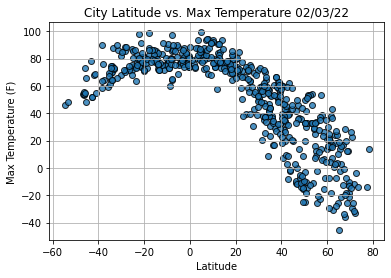

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter (lats,
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure. 
plt.savefig("weather_data/Fig1.png")

#Show plot. 
plt.show()


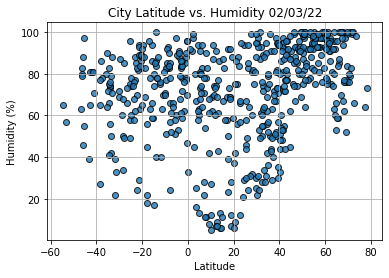

In [15]:
plt.scatter (lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure. 
plt.savefig("weather_data/Fig2.png")

#Show plot. 
plt.show()

## Plot Latitude vs. Cloudiness


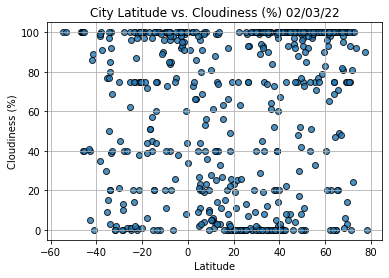

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

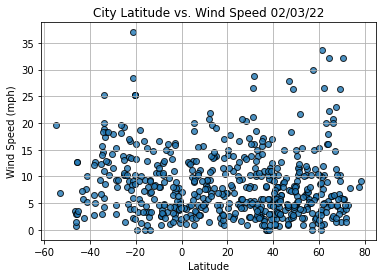

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
#Import linregress
from scipy.stats import linregress


# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values,y_values,title, y_label, text_coordinates):

    #Run regression on hemisphere weather data.
    (slope, intercept,r_value,p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "Y values" from the slope and intercept. 
    regress_values=x_values*slope + intercept
    
    #Get the equation of the line. 
    line_eq = "y =" + str(round(slope,2)) +"x +" + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    #Annotate the text for line equation.
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                   Chokurdakh
Country                        RU
Date          2022-02-03 15:43:05
Lat                       70.6333
Lng                      147.9167
Max Temp                   -29.06
Humidity                      100
Cloudiness                     93
Wind Speed                   3.58
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
550     True
551    False
552     True
553     True
554     True
Name: Lat, Length: 555, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Singarayakonda,IN,2022-02-03 15:43:01,15.2500,80.0333,76.03,67,56,13.82
4,Jyvaskyla,FI,2022-02-03 15:43:02,62.2415,25.7209,7.16,86,0,1.14
8,Balabac,PH,2022-02-03 15:43:03,7.9868,117.0645,80.62,78,56,11.14
10,Araouane,ML,2022-02-03 15:43:04,18.9048,-3.5265,82.80,7,26,10.38
13,Chokurdakh,RU,2022-02-03 15:43:05,70.6333,147.9167,-29.06,100,93,3.58


## Create the Hemisphere DataFrames

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

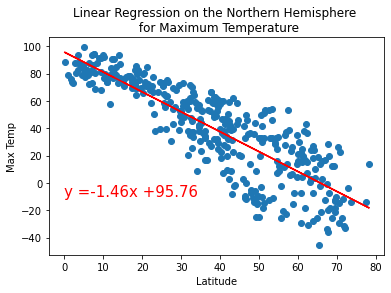

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature","Max Temp",(0,-10))

## Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

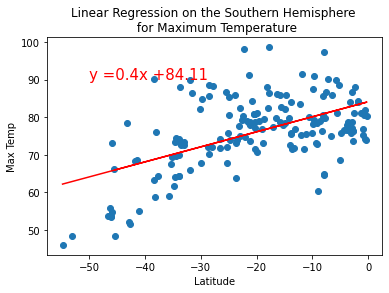

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature','Max Temp',(-50,90))

## Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

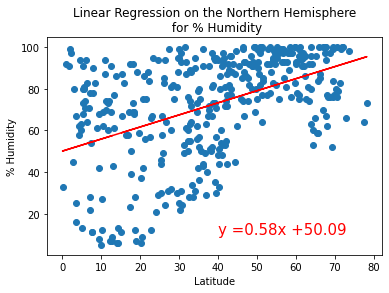

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity','% Humidity',(40,10))

## Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

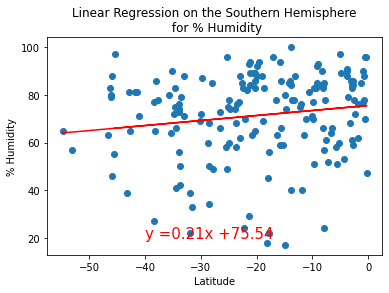

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity','% Humidity',(-40,20))

## Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

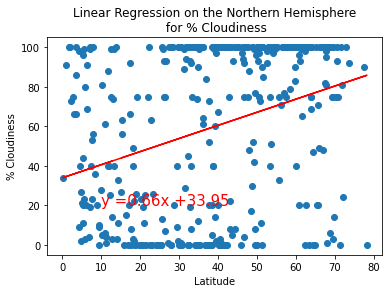

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness','% Cloudiness',(10,20))

## Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

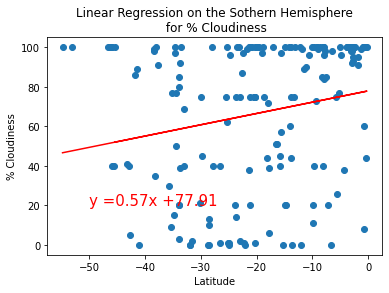

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Sothern Hemisphere\n for % Cloudiness','% Cloudiness',(-50,20))

## Perform Linear Regression on the Wind Speed for the Northern Hemisphere

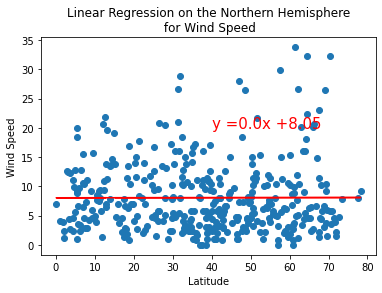

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed','Wind Speed',(40,20))

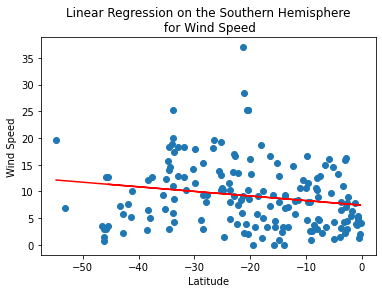

In [62]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed','Wind Speed',(=4,20))